# The GTA Housing, Machine Learning Project

Currently, the GTA is projected to be the fastest growing region of the province, accounting for over 65 percent of Ontario's net population growth to 2041. In July 2019, the Toronto Real Estate board reported that nearly 8,595 houses were sold which is up 24.3% compared to June 2018. With the massive number of houses being sold, and countless more being listed for sale, data was plentiful regarding the subject.

In this project and analysis, we will attempt to predict the value of a house, given its characteristics using Machine Learning Algorithms. Let's get started!

# # Table of Contents






In [1]:
import pandas as pd
import os
import csv

MY_DIR = "C:\\Users\\Adit Krishnan\\Documents\\Third Year\\Webscraping"


def load_housing_data(my_dir= MY_DIR):
    csv_path = os.path.join(my_dir, "housing_data.csv")
    return pd.read_csv(csv_path,converters={"Price(in CAD)":float})

Prior to working with the data, I undertook the task of scraping all the data from the MLS listing site, and formatting it to fit into a CSV file, which we can then work with to analyze the data using pandas. The above code simply loads that data into a pandas data frame, which we can then work with to gain more insight from the data.  

In [2]:
housing = load_housing_data() 
housing.head()

,Address,Postal Code,Latitude,Longitude,City,Neighbourhood,Price(in CAD),# of Bathrooms,# of Bedrooms,Height(in stories),# of Kitchens,# of Parking Spaces,Lot-Size(in km^2),Total Lot Size(in km^2),Basement(finished or not),House HTML
0,"86 Wessenger Dr, Holly, Barrie L4N8N7",L4N8N7,44.328711,-79.717816,Barrie,Holly,1880.0,2,3,2.0,1.0,3.0,14.22 x 35.00,497.7000,No Basement,https://barrie.listing.ca/86-wessenger-dr.S452...
1,"86 Wessenger Dr, Holly, Barrie L4N8N7",L4N8N7,44.328711,-79.717816,Barrie,Holly,1880.0,2,3,2.0,1.0,3.0,14.22 x 35.00,497.7000,No Basement,https://barrie.listing.ca/86-wessenger-dr.S452...
2,"1404 Harmsworth Sq, Iroquois Ridge South, Oakv...",L6H3E7,43.486101,-79.686371,Oakville,Iroquois Ridge South,2900.0,2,4,1.0,1.0,2.0,39.50 x 100.39,3965.4050,Finished,https://oakville.listing.ca/1404-harmsworth-sq...
3,"97 Pinehill Dr, Stoney Creek, Hamilton L0R1C0",L0R1C0,43.076196,-79.747773,Hamilton,Stoney Creek,3000.0,3,4,2.0,1.0,2.0,48.66 x 98.43,4789.6038,Finished,https://hamilton.listing.ca/97-pinehill-dr.X45...
4,"2350 Bridletowne Circ 806, L'Amoreaux, Toronto...",M1W3E6,43.800991,-79.316049,Toronto,L'Amoreaux,3300.0,2,3,NaN,1.0,2.0,NaN,NaN,No Basement,https://toronto.listing.ca/2350-bridletowne-ci...


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16274 entries, 0 to 16273
Data columns (total 16 columns):
Address                      16274 non-null object
Postal Code                  16268 non-null object
Latitude                     16274 non-null float64
Longitude                    16274 non-null float64
City                         16274 non-null object
Neighbourhood                16274 non-null object
Price(in CAD)                16274 non-null float64
# of Bathrooms               16274 non-null int64
# of Bedrooms                16274 non-null int64
Height(in stories)           12184 non-null float64
# of Kitchens                16002 non-null float64
# of Parking Spaces          10784 non-null float64
Lot-Size(in km^2)            11428 non-null object
 Total Lot Size(in km^2)     11371 non-null float64
Basement(finished or not)    16274 non-null object
House HTML                   16274 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 2.0+ MB


Calling the info() and head() method, we can get a very brief and quick overview of the data. "housing.head()" gives an overview of the top 5 entries in the data and the info method reveals how many of each subcategory is present in the data. Notice that some of the values are missing, which will need to be fixed later on, if we are to use this data for Machine Learning later on.

In [4]:
housing["# of Parking Spaces"].value_counts()

2.0    4153
4.0    3355
3.0    1139
6.0     957
5.0     388
0.0     345
8.0     288
7.0      92
9.0      60
1.0       7
Name: # of Parking Spaces, dtype: int64

In [5]:
housing.describe()

,Latitude,Longitude,Price(in CAD),# of Bathrooms,# of Bedrooms,Height(in stories),# of Kitchens,# of Parking Spaces,Total Lot Size(in km^2)
count,16274.000000,16274.000000,1.627400e+04,16274.000000,16274.000000,12184.000000,16002.000000,10784.000000,11371.000000
mean,43.781712,-79.444649,1.118783e+06,2.997911,3.681639,1.842580,1.220972,3.367953,8191.411673
std,0.252923,0.283367,9.761885e+05,1.454864,1.527349,0.550948,0.539928,1.672920,21214.521967
min,42.878706,-81.332785,1.880000e+03,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,43.656871,-79.649063,5.999000e+05,2.000000,3.000000,2.000000,1.000000,2.000000,3201.000000
50%,43.761077,-79.452046,8.299000e+05,3.000000,4.000000,2.000000,1.000000,3.000000,4944.511800
75%,43.880001,-79.354488,1.289000e+06,4.000000,5.000000,2.000000,1.000000,4.000000,7381.310000
max,46.329364,-74.727106,2.199900e+07,9.000000,18.000000,3.000000,18.000000,9.000000,555100.000000


Calling housing.describe() we can gain even more valuable information about the data such as the count, mean, standard deviation, etc.

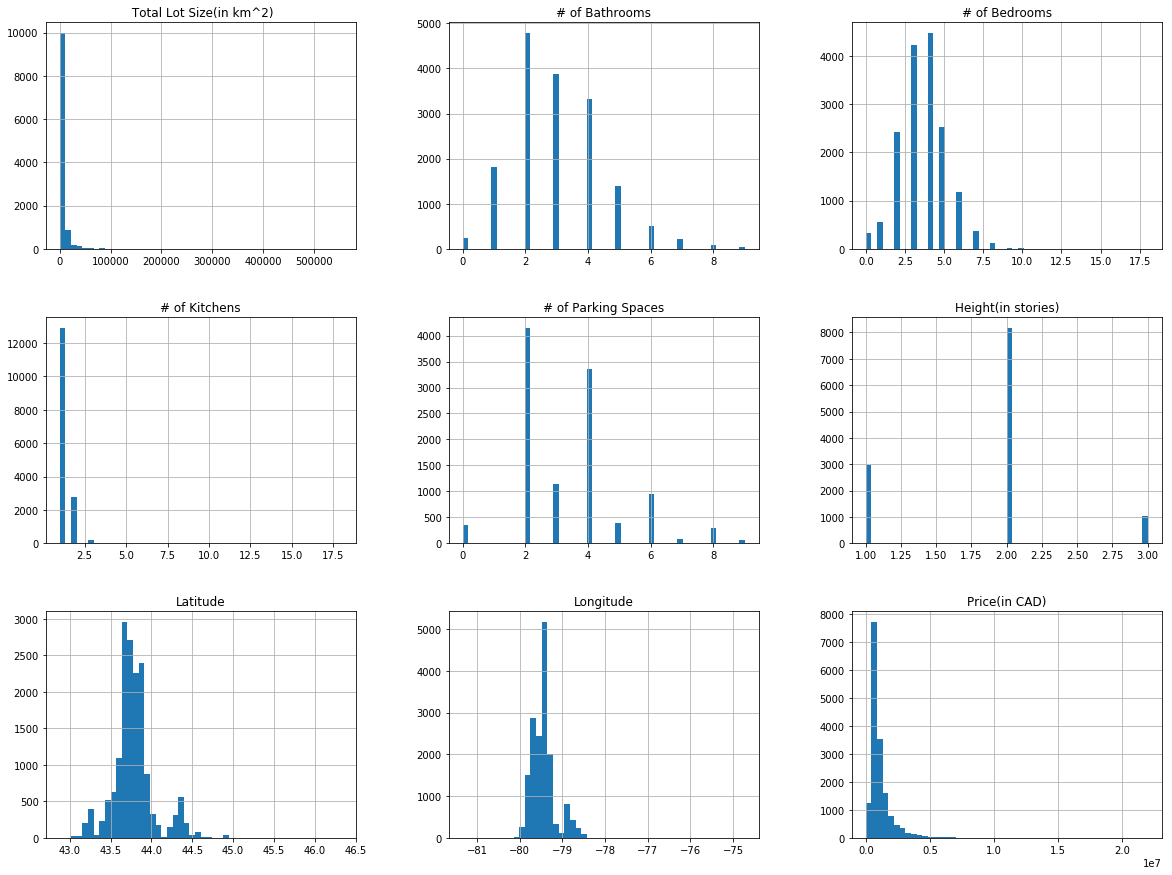

In [6]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
import numpy as np

housing["value_cat"] = np.ceil(housing["Price(in CAD)"] / 100000)
housing["value_cat"].where(housing["value_cat"] < 20, 20.0, inplace=True)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["value_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Now, we are taking some of the first steps towards preparing our data to be used for Machine Learning processes. We are creating two seperate sets, a training set and a test set which has been split according to an index I created known as the "value_cat" which is based on the prices of the houses. The StratifiedShuffleSplit() method from sklearn ensures that a proportional amount from each price category is chosen to create the train set and test set so that we can avoid any biases in the data. The exact proportions are seen below. Sci-Kit really does make life a little bit easier. 

In [8]:
housing["value_cat"].value_counts() / len(housing)

7.0     0.116075
6.0     0.113863
20.0    0.113617
8.0     0.109008
9.0     0.092725
5.0     0.092233
10.0    0.065933
12.0    0.045041
13.0    0.039327
4.0     0.037790
11.0    0.037237
14.0    0.029372
15.0    0.026361
16.0    0.021384
17.0    0.016960
18.0    0.015546
19.0    0.011859
3.0     0.009156
1.0     0.004240
2.0     0.002274
Name: value_cat, dtype: float64

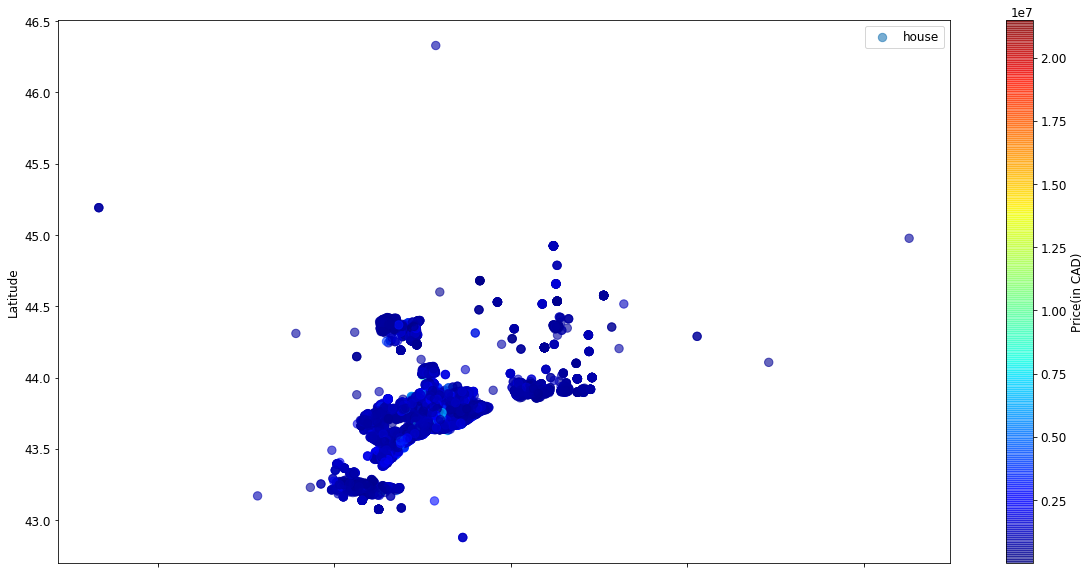

In [47]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.6, 
             s=70 ,label="house", c="Price(in CAD)", cmap=plt.get_cmap("jet"), colorbar=True)

plt.legend
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 22})
plt.savefig('distribution_of_prices.png', bbox_inches='tight')

Above, we can see a graph which graphs the distribution of houses in GTA, with as associated color bar on the right which shows their listing price/value. Amazingly, we can kind of see the shape of the shoreline of Lake Ontario on the right side. However, sadly, there is not much insight we can gain from this graph as it just appears to show that most houses are in the $500,000 - $750,000 dollar price range. It is not as effective at communicating the distribution of values of houses in different regions as I expected. Thus, we will have to try using different charts to gain a more better understanding.

In [10]:
# from ipynb.fs.full.ml_practice_project import test_set_check, split_train_test_by_id
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [11]:
for set in (strat_train_set, strat_test_set):
    set.drop(["value_cat"], axis=1, inplace=True)

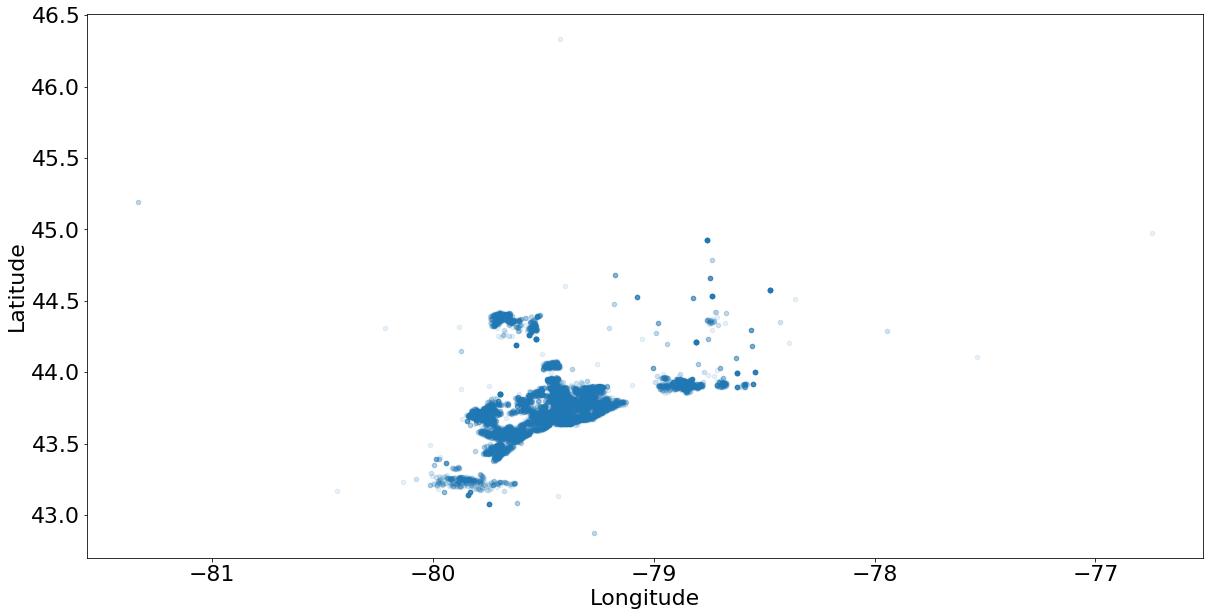

In [12]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1)

In [13]:
housing.head()

,Address,Postal Code,Latitude,Longitude,City,Neighbourhood,Price(in CAD),# of Bathrooms,# of Bedrooms,Height(in stories),# of Kitchens,# of Parking Spaces,Lot-Size(in km^2),Total Lot Size(in km^2),Basement(finished or not),House HTML
3685,"7080 Copenhagen Rd 31, Meadowvale, Mississauga...",L5N2C9,43.596566,-79.765165,Mississauga,Meadowvale,585000.0,2,4,2.0,1.0,NaN,NaN,NaN,No Basement,https://mississauga.listing.ca/7080-copenhagen...
3373,"12 Bothwell Cres, Grove East, Barrie L4M2S6",L4M2S6,44.402253,-79.686642,Barrie,Grove East,569000.0,3,3,1.0,2.0,3.0,55.00 x 110.00,6050.0,Finished,https://barrie.listing.ca/12-bothwell-cres.S44...
1477,"4725 Sheppard Ave 104, Agincourt South-Malvern...",M1S5B2,43.790323,-79.255557,Toronto,Agincourt South-Malvern West,458000.0,2,3,NaN,1.0,NaN,NaN,NaN,No Basement,https://toronto.listing.ca/4725-sheppard-ave-1...
607,"52 Martha St, McQuesten, Hamilton L8H2B7",L8H2B7,43.239704,-79.786591,Hamilton,McQuesten,385000.0,1,3,1.0,1.0,3.0,40.00 x 100.00,4000.0,Unfinished,https://hamilton.listing.ca/52-martha-st.X4486...
4571,"2676 Folkway Dr 90, Erin Mills, Mississauga L5...",L5L2G5,43.547874,-79.699473,Mississauga,Erin Mills,629500.0,3,3,2.0,1.0,2.0,NaN,NaN,No Basement,https://mississauga.listing.ca/2676-folkway-dr...


In [14]:
housing["pricing_cat"] = round(housing["Price(in CAD)"], -5)       
housing["pricing_cat"]

3685      600000.0
3373      600000.0
1477      500000.0
607       400000.0
4571      600000.0
5985      700000.0
4057      600000.0
10344    1000000.0
10750    1100000.0
16044    4400000.0
1982      500000.0
9345      900000.0
13181    1500000.0
1909      500000.0
2505      500000.0
14723    2100000.0
4513      600000.0
3071      500000.0
7974      800000.0
1907      500000.0
15786    3400000.0
7222      800000.0
5115      700000.0
3007      500000.0
3989      600000.0
3753      600000.0
2930      500000.0
3091      500000.0
11945    1200000.0
15174    2500000.0
           ...    
10637    1000000.0
2946      500000.0
2504      500000.0
3733      600000.0
6503      700000.0
5918      700000.0
13931    1700000.0
6861      800000.0
13560    1600000.0
1994      500000.0
7978      800000.0
11958    1200000.0
7585      800000.0
13670    1600000.0
5693      700000.0
14840    2200000.0
14724    2100000.0
3479      600000.0
7881      800000.0
5489      700000.0
99        200000.0
1153      40

Here, we are adding a price category section to our data, so that we can create a pie chart depicting the breakdown of the houses and their respective prices. We can gain a better understanding of exactly what percent of houses fall into a particular price range in the GTA.

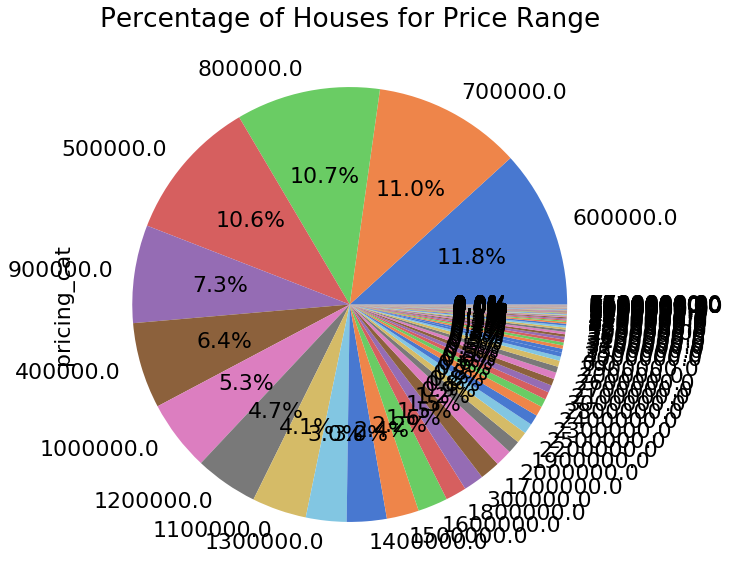

In [15]:
import seaborn as sns
c = sns.color_palette('muted')
for i in range(21):
    c.append(c[i])
ax = housing["pricing_cat"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=c, title='Percentage of Houses for Price Range')
plt.rcParams.update({'font.size': 12})

Ah, so it is just as we hypothesized earlier from the scatter chart. Not the most visually appealing chart, but it confirms that majority of houses in the GTA are in the 600000 to 1000000 dollar price range* 

*The price_cat attribute was created by rounding a particular house value down to the nearest 100000 so for example houses in the 600000 price_cat have a price between 600000 to 700000).

In [16]:
corr_matrix = housing.corr()
corr_matrix["Price(in CAD)"].sort_values(ascending=False)

Price(in CAD)               1.000000
pricing_cat                 0.999580
# of Bathrooms              0.577366
# of Bedrooms               0.421550
# of Parking Spaces         0.176672
 Total Lot Size(in km^2)    0.159045
# of Kitchens               0.145903
Height(in stories)          0.113323
Longitude                  -0.043664
Latitude                   -0.090715
Name: Price(in CAD), dtype: float64

By calling the corr method, we can measure the correlation between the variables and see which one correlates the strongest with the price. We can ignore the pricing_cat, and the next strongest variable appears to be the # Of Bathrooms upon first glance. However, I have a feeling this does not tell us the complete picture, and some more work has to be done to gain more insights into the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FEB5662400>,
      dtype=object)

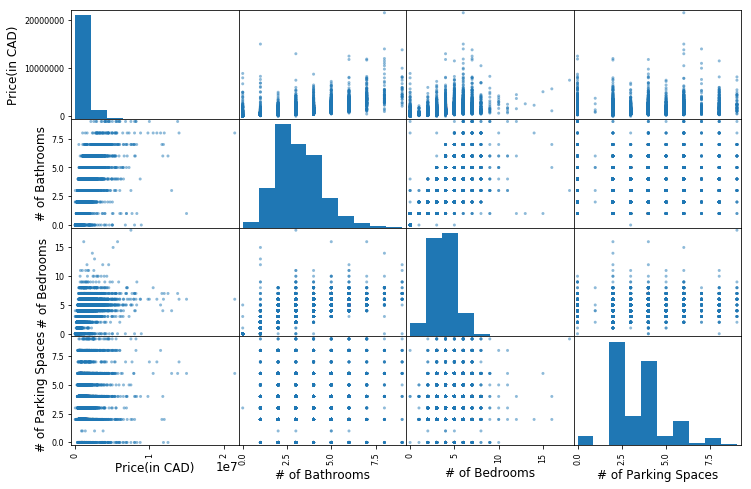

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["Price(in CAD)", "# of Bathrooms", "# of Bedrooms", 
             "# of Parking Spaces"]
scatter_matrix(housing[attributes], figsize=(12, 8))

We can also measure correlation visually using the scatter_matrix method. Recall that # of Bathrooms had a strong correlation so we can take a closer look at that. 

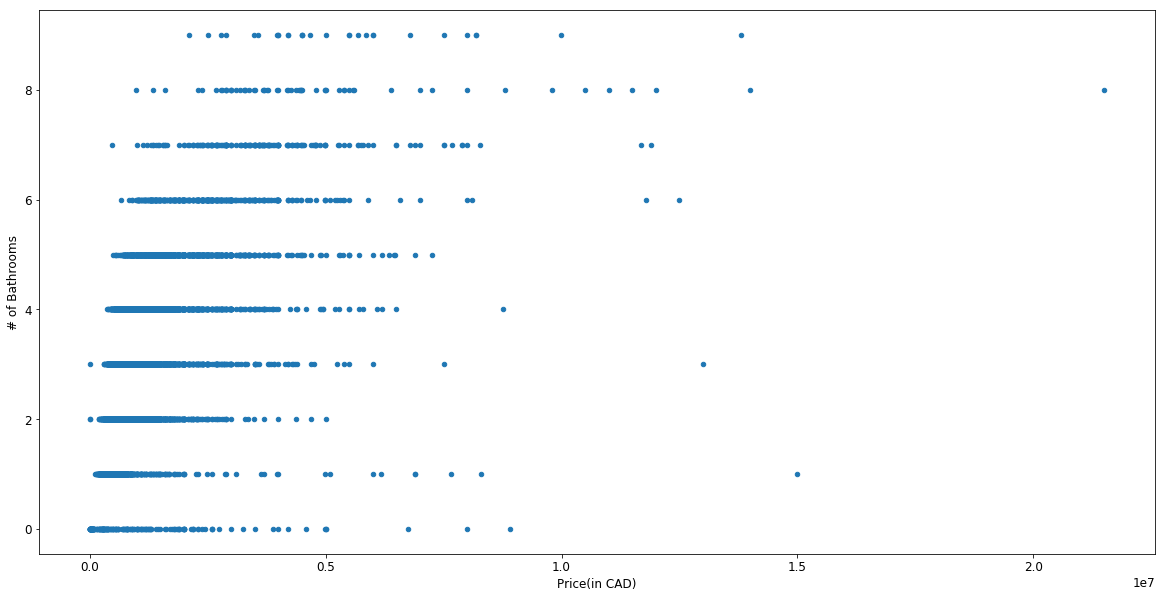

In [18]:
housing.plot(kind="scatter", x="Price(in CAD)", y="# of Bathrooms")

We can see now more clearly that the correlation between price and number of bathrooms was not entirely true. Since we are comparing a continous variable with one that has discrete values, these discrepancies can occur. Thus, we see that strictly speaking the characteristics of the house do not have a direct correlation on the value of the house. 



The code below is to implement a stacked bar graph later of the data. This is still a work in progress, and I will be adding more charts and data as I continue to work on this project.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def stacked_bar(data, series_labels, category_labels=None, 
                show_values=False, value_format="{}", y_label=None, 
                grid=True, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """
    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i]))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels)

    if y_label:
        plt.ylabel(y_label)
    
    plt.legend()

    if grid:
        plt.grid()


In [20]:
housing = strat_train_set.drop("Price(in CAD)", axis=1)
housing_labels = strat_train_set["Price(in CAD)"].copy()

Moving onto prepping the data to make it suitable to apply Machine Learning algorithms. Recall that our data had a lot of values missing from it initially. To aid in this, we can use the imputer method, which fills in for these missing values using the median. 

In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [22]:
housing_num = housing.drop(['Address', 'Postal Code', 'City', 'Neighbourhood', 'Lot-Size(in km^2)', 'Basement(finished or not)',
                           'House HTML'], axis=1)
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [23]:
imputer.statistics_

array([ 4.37615368e+01, -7.94517010e+01,  3.00000000e+00,  4.00000000e+00,
        2.00000000e+00,  1.00000000e+00,  3.00000000e+00,  4.94974970e+03])

In [24]:
housing_num.median().values

array([ 4.37615368e+01, -7.94517010e+01,  3.00000000e+00,  4.00000000e+00,
        2.00000000e+00,  1.00000000e+00,  3.00000000e+00,  4.94974970e+03])

In [25]:
X = imputer.transform(housing_num)
print(X)

[[ 4.35965665e+01 -7.97651652e+01  2.00000000e+00 ...  1.00000000e+00
   3.00000000e+00  4.94974970e+03]
 [ 4.44022530e+01 -7.96866420e+01  3.00000000e+00 ...  2.00000000e+00
   3.00000000e+00  6.05000000e+03]
 [ 4.37903230e+01 -7.92555570e+01  2.00000000e+00 ...  1.00000000e+00
   3.00000000e+00  4.94974970e+03]
 ...
 [ 4.39222240e+01 -7.88703710e+01  2.00000000e+00 ...  1.00000000e+00
   3.00000000e+00  1.28478588e+04]
 [ 4.37801650e+01 -7.92489440e+01  1.00000000e+00 ...  1.00000000e+00
   3.00000000e+00  4.94974970e+03]
 [ 4.37058250e+01 -7.93980050e+01  2.00000000e+00 ...  1.00000000e+00
   3.00000000e+00  4.94974970e+03]]


In [26]:
import pandas as pd
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["Basement(finished or not)"]
housing_cat_2 = housing["City"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded_2 = encoder.fit_transform(housing_cat_2)
housing_cat_encoded

array([1, 0, 1, ..., 1, 1, 1])

Now, one final step before applying the Machine Learning algorithms is encoding the values. We are using something known as "One Hot Encoding" which transforms non-categorical data into numerical values (either one or zero). This can be easily fed into the algorithm for us to be able to utilize various algorithms. This is not a requirement for all Machine Learning Algorithms, however, it just makes the task a lot easier as we just have to do it once, and apply it to all our ML algorithms afterwards

In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder, encoder_2 = OneHotEncoder(), OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot_2 = encoder_2.fit_transform(housing_cat_encoded_2.reshape(-1, 1))
housing_cat_1hot.toarray()
housing_cat_1hot_2.toarray()

C:\Users\Adit Krishnan\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Adit Krishnan\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'"

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [29]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)

In [30]:
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin 

class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

num_attribs = list(housing_num)
cat_attribs = ["Basement(finished or not)"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', MyLabelBinarizer()),
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

Just to summarize everything we have done with the dataset thus far, and so that it does not have to be repeated everytime we create a new subset of the housing data, I have utilized sklearn's pipeline method so that we can just call the full_pipeline method to quickly and reliably transform our data whenever it is needed.

In [31]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-7.33017308e-01, -1.13601424e+00, -6.82376849e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 2.47623588e+00, -8.57666515e-01,  3.68880836e-03, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.87638564e-02,  6.70436956e-01, -6.82376849e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 5.64158913e-01,  2.03583836e+00, -6.82376849e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-1.69802778e-03,  6.93878616e-01, -1.36844251e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-2.97813057e-01,  1.65489479e-01, -6.82376849e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00]])

Our data is finally ready to be used for Machine Learning. One of the most common and basic algorithms is Linear Regression. I am just going to test this model to see that everything is working probably thus far.

In [32]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", lin_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 742126.57388828  803138.368766    749761.22488484  452731.16219382
 1100348.25135829]
Labels:		 [585000.0, 569000.0, 458000.0, 385000.0, 629500.0]


Nice! Atleast everything is working properly. However, as is immediately evident, the regression is working quite poorly, as the predictions it is making is way off. Let's measure the mean squared error to see exactly how bad it is performing.

In [34]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

754862.5759978748

With a mean squared error of nearly $754,862 (indicates that this is the margin of error), this is clearly not the most effective Machine Learning Algorithm

In [35]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Another method we can try is a Decision Tree Regressor, which is a much more advanced algorithm than Linear Regression and will most probably yield much better results. 

In [46]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", tree_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions:	 [585000. 569000. 458000. 385000. 629500.]
Labels:		 [585000.0, 569000.0, 458000.0, 385000.0, 629500.0]


What! It appears our algorithm is working perfectly! NO not true. What we are seeing here is an example of something known as "overfitting", as the algorithm is modelling the training set too well and is picking up on the noise. It is definitely not perfect and the best way to see how it is doing is to look at the mean squared error, which we see below. 

While it is not perfect, we can definitely see that we are improving and on the right track.

In [36]:
import numpy as np
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

52576.723790007796

Now, we are using a more powerful Machine Learning model known as a Decision Tree Regressor and we can see that the mean squared error has reduced much more drastically, so we are on the right track to picking the most effective model

In [37]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(rmse_scores)

Scores:  [721024.9165245  760510.48015845 644542.4200336  738652.825338
 822738.58366943 622938.156054   824141.39124784 550138.3287197
 589831.82013134 619092.26527471]
Mean:  689361.1187151565
Standard deviation:  92248.18377813188


Above, I have created a function which will allow us to get a complete picture regarding the accuracy of our algorithms. I am still experimenting with other algorithms such as a random forest regressor to finally see which algorithm works best for my project. Once selected, I am also dabbling in finally tuning it to get the best result. This is a work in progress, and I will soon have the correct model for the data.

In [38]:
from sklearn.model_selection import cross_val_score
import numpy as np

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [811437.99987693 614350.50236079 791743.87134382 819435.92568781
 911643.61227115 697874.693376   709219.81512828 776902.53662365
 731830.44091368 666291.51049579]
Mean:  753073.0908077903
Standard deviation:  81984.50631951755


In [39]:
from sklearn.ensemble import RandomForestRegressor
import warnings 

with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    # execute code that will generate warnings
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

C:\Users\Adit Krishnan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores:  [535269.87289409 494226.22852609 580540.69033395 560940.56237147
 686012.88206795 476505.98434988 517230.36254928 500110.51408767
 455631.8722265  472806.7282837 ]
Mean:  527927.5697690572
Standard deviation:  64680.77553868675


In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [41]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [42]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

628382.9089506849 {'max_features': 2, 'n_estimators': 3}
551927.0920830122 {'max_features': 2, 'n_estimators': 10}
536835.4547593623 {'max_features': 2, 'n_estimators': 30}
589799.2829922946 {'max_features': 4, 'n_estimators': 3}
524868.1513879866 {'max_features': 4, 'n_estimators': 10}
503236.2843670251 {'max_features': 4, 'n_estimators': 30}
590032.5925107405 {'max_features': 6, 'n_estimators': 3}
528322.3999061713 {'max_features': 6, 'n_estimators': 10}
508023.0018108602 {'max_features': 6, 'n_estimators': 30}
576271.5744099559 {'max_features': 8, 'n_estimators': 3}
525232.6834087388 {'max_features': 8, 'n_estimators': 10}
504510.4952349692 {'max_features': 8, 'n_estimators': 30}
624806.948832682 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
545635.1731156124 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
592304.462153719 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
527223.3306354916 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}


In [43]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.15158325, 0.14797964, 0.30153621, 0.10372944, 0.02308194,
       0.0211726 , 0.04467885, 0.19089645, 0.00678788, 0.00697981,
       0.00157392])

In [44]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("Price(in CAD)", axis=1)
y_test = strat_test_set["Price(in CAD)"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

619013.4086240078
